<a href="https://colab.research.google.com/github/AnitaTasnim/GNN_attack_model/blob/main/GCN_in_cora_deep_robust_modified_sdrf_attack_10_percent_attack_70_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import library

In [2]:
import torch

if torch.cuda.is_available():
    # Code to run when CUDA is available (for GPU)
    device = torch.device("cuda")
    print("CUDA is available. Using GPU.")
else:
    # Code to run when CUDA is not available (for CPU)
    device = torch.device("cpu")
    print("CUDA is not available. Using CPU.")

# Now you can use `device` to specify whether you want to use GPU or CPU for your code.


CUDA is available. Using GPU.


In [3]:
#https://deeprobust.readthedocs.io/en/latest/notes/installation.html

In [4]:
!git clone https://github.com/DSE-MSU/DeepRobust.git
%cd DeepRobust
!python setup.py install

Cloning into 'DeepRobust'...
remote: Enumerating objects: 5822, done.
remote: Counting objects: 100% (1534/1534), done.
remote: Compressing objects: 100% (636/636), done.
remote: Total 5822 (delta 961), reused 1455 (delta 890), pack-reused 4288
Receiving objects: 100% (5822/5822), 12.08 MiB | 22.09 MiB/s, done.
Resolving deltas: 100% (3824/3824), done.
/content/DeepRobust
running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/p

In [5]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.0 MB/s eta 0:00:00


In [6]:
#!pip install torch-sparse
#!pip install torch-scatter
#it takes so long , almost 1 hour

In [7]:
'''!pip install torch-geometric \
  torch-sparse \
  torch-scatter \
  torch-cluster \
  -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html''' #also take so loooooooooooooooong

'!pip install torch-geometric   torch-sparse   torch-scatter   torch-cluster   -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html'

In [8]:
import torch
print(torch.__version__)

2.0.1+cu118


In [9]:
import torch

!echo https://data.pyg.org/whl/torch-{torch.__version__}.html

https://data.pyg.org/whl/torch-2.0.1+cu118.html


In [10]:
#!pip uninstall torch-scatter torch-sparse torch-geometric torch-cluster
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.0.1+cu118.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.0.1+cu118.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-2.0.1+cu118.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 54.5 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 28.9 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 25.1 MB/s eta 0:00:00
  Cloning https://github.com/pyg-team/pytorch_geometric.git to /tmp/pip-req-build-iz7e04nz
  Running command git clone --filter=blob:none --quiet https://github.com/pyg-team/pytorch_geometric.git /tmp/pip-req-build-iz7e04nz
  Resolved https://github.com/pyg-team/pytorch_geometric.git to commit 62599d19811b0e41af9f81476ca4ef3e7e2d92e7
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [11]:
import numpy as np

In [12]:
from deeprobust.graph.defense import GCN

In [13]:
import random

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

#Converting Graph Data between DeepRobust and PyTorch Geometric

In [15]:
from deeprobust.graph.data import Dataset, Dpr2Pyg, Pyg2Dpr

data = Dataset(root='/tmp/', name='cora',seed=15) # load clean graph
pyg_data = Dpr2Pyg(data) # convert dpr to pyg
print(pyg_data)
print(pyg_data[0])
#dpr_data = Pyg2Dpr(pyg_data) # convert pyg to dpr
#print(dpr_data.adj)

Loading cora dataset...
Done!
Selecting 1 largest connected components
Dpr2Pyg()
Data(x=[2485, 1433], edge_index=[2, 10138], y=[2485], train_mask=[2485], val_mask=[2485], test_mask=[2485])


Processing...
/content/DeepRobust/deeprobust/graph/data/pyg_dataset.py:48: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  edge_index = torch.LongTensor(dpr_data.adj.nonzero())
Done!
/usr/local/lib/python3.10/dist-packages/torch_geometric/data/in_memory_dataset.py:284: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


In [16]:
pyg_data[0]

Data(x=[2485, 1433], edge_index=[2, 10138], y=[2485], train_mask=[2485], val_mask=[2485], test_mask=[2485])

In [17]:
pyg_data[0]

Data(x=[2485, 1433], edge_index=[2, 10138], y=[2485], train_mask=[2485], val_mask=[2485], test_mask=[2485])

In [18]:
graph = pyg_data[0]
graph

Data(x=[2485, 1433], edge_index=[2, 10138], y=[2485], train_mask=[2485], val_mask=[2485], test_mask=[2485])

In [19]:
graph.edge_index.T #connected node pairs

tensor([[   0, 1084],
        [   0, 1104],
        [   0, 1288],
        ...,
        [2484, 1184],
        [2484, 1255],
        [2484, 1894]])

In [20]:
adj = graph.edge_index.t() ## Get the adjacency matrix,
adj

tensor([[   0, 1084],
        [   0, 1104],
        [   0, 1288],
        ...,
        [2484, 1184],
        [2484, 1255],
        [2484, 1894]])

In [21]:
graph.edge_index

tensor([[   0,    0,    0,  ..., 2484, 2484, 2484],
        [1084, 1104, 1288,  ..., 1184, 1255, 1894]])

In [22]:
features = graph.x
print(features)
labels = graph.y
print(labels)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([5, 2, 0,  ..., 2, 2, 2])


In [23]:
print(f"Number of edges: {adj.size(0)}")


Number of edges: 10138


In [24]:
graph.num_nodes

2485

In [25]:
graph.num_edges

10138

In [26]:
print(f'Actual number of edges: {graph.num_edges // 2}')
 # Divide by 2 because the graph is undirected

Actual number of edges: 5069


#visualise PyG

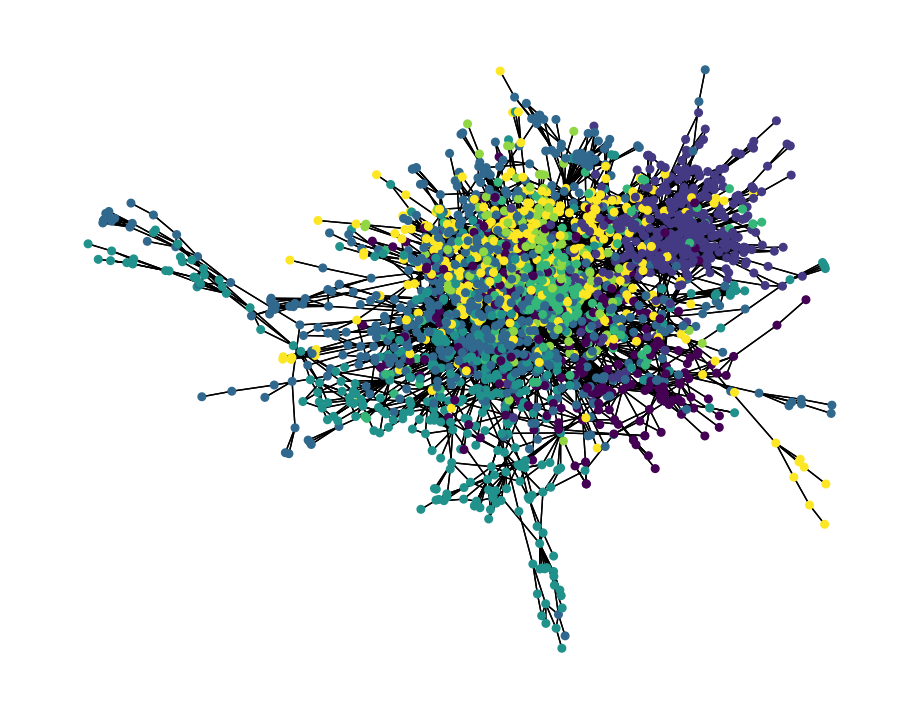

In [29]:
import random
from torch_geometric.utils import to_networkx
import networkx as nx

def convert_to_networkx(graph, n_sample=None):

    G = to_networkx(graph, node_attrs=["x"])
    y = graph.y.numpy()

    if n_sample is not None:
        sampled_nodes = random.sample(g.nodes, n_sample)
        G = G.subgraph(sampled_nodes)
        y = y[sampled_nodes]

    return G, y


def plot_graph(G, y):

    plt.figure(figsize=(9, 7))
    nx.draw_spring(G, node_size=30, arrows=False, node_color=y)
    plt.show()


A, y = convert_to_networkx(graph)
plot_graph(A, y)

#calculate balanced forman ricci curvature

In [27]:
def softmax(a, tau=1):
    exp_a = np.exp(a * tau)
    return exp_a / exp_a.sum()

In [28]:
!pip install numba numpy torch torch-geometric networkx


In [29]:
import math
from numba import cuda
import numpy as np
import torch
from torch_geometric.utils import (
    to_networkx,
    from_networkx,
    to_dense_adj,
    remove_self_loops,
    to_undirected,
)

In [30]:
@cuda.jit(
    "void(float32[:,:], float32[:,:], float32[:], float32[:], int32, float32[:,:])"
)

SyntaxError: ignored

In [32]:



@cuda.jit(
    "void(float32[:,:], float32[:,:], float32[:], float32[:], int32, float32[:,:])"
)
def _balanced_forman_curvature(A, A2, d_in, d_out, N, C):
    #print('_balanced_forman_curvature working')
    i, j = cuda.grid(2)

    if (i < N) and (j < N):
        if A[i, j] == 0:
            C[i, j] = 0
            return

        if d_in[i] > d_out[j]:
            d_max = d_in[i]
            d_min = d_out[j]
        else:
            d_max = d_out[j]
            d_min = d_in[i]

        if d_max * d_min == 0:
            C[i, j] = 0
            return

        sharp_ij = 0
        lambda_ij = 0
        for k in range(N):
            TMP = A[k, j] * (A2[i, k] - A[i, k]) * A[i, j]
            if TMP > 0:
                sharp_ij += 1
                if TMP > lambda_ij:
                    lambda_ij = TMP

            TMP = A[i, k] * (A2[k, j] - A[k, j]) * A[i, j]
            if TMP > 0:
                sharp_ij += 1
                if TMP > lambda_ij:
                    lambda_ij = TMP

        C[i, j] = (
            (2 / d_max) + (2 / d_min) - 2 + (2 / d_max + 1 / d_min) * A2[i, j] * A[i, j]
        )
        if lambda_ij > 0:
            C[i, j] += sharp_ij / (d_max * lambda_ij)


def balanced_forman_curvature(A, C=None):
    #print('balanced_forman_curvature')
    N = A.shape[0]
    A2 = torch.matmul(A, A)
    d_in = A.sum(axis=0)
    d_out = A.sum(axis=1)
    if C is None:
        C = torch.zeros(N, N).cuda()

    threadsperblock = (16, 16)
    blockspergrid_x = math.ceil(N / threadsperblock[0])
    blockspergrid_y = math.ceil(N / threadsperblock[1])
    blockspergrid = (blockspergrid_x, blockspergrid_y)

    _balanced_forman_curvature[blockspergrid, threadsperblock](A, A2, d_in, d_out, N, C)
    return C


@cuda.jit(
    "void(float32[:,:], float32[:,:], float32, float32, int32, float32[:,:], int32, int32, int32[:], int32[:], int32, int32)"
)
def _balanced_forman_post_delta(
    A, A2, d_in_x, d_out_y, N, D, x, y, i_neighbors, j_neighbors, dim_i, dim_j
):
    #print('_balanced_forman_post_delta working')
    I, J = cuda.grid(2)

    if (I < dim_i) and (J < dim_j):
        i = i_neighbors[I]
        j = j_neighbors[J]

        if (i == j) or (A[i, j] != 0):
            D[I, J] = -1000
            return

        # Difference in degree terms
        if j == x:
            d_in_x += 1
        elif i == y:
            d_out_y += 1

        if d_in_x * d_out_y == 0:
            D[I, J] = 0
            return

        if d_in_x > d_out_y:
            d_max = d_in_x
            d_min = d_out_y
        else:
            d_max = d_out_y
            d_min = d_in_x

        # Difference in triangles term
        A2_x_y = A2[x, y]
        if (x == i) and (A[j, y] != 0):
            A2_x_y += A[j, y]
        elif (y == j) and (A[x, i] != 0):
            A2_x_y += A[x, i]

        # Difference in four-cycles term
        sharp_ij = 0
        lambda_ij = 0
        for z in range(N):
            A_z_y = A[z, y] + 0
            A_x_z = A[x, z] + 0
            A2_z_y = A2[z, y] + 0
            A2_x_z = A2[x, z] + 0

            if (z == i) and (y == j):
                A_z_y += 1
            if (x == i) and (z == j):
                A_x_z += 1
            if (z == i) and (A[j, y] != 0):
                A2_z_y += A[j, y]
            if (x == i) and (A[j, z] != 0):
                A2_x_z += A[j, z]
            if (y == j) and (A[z, i] != 0):
                A2_z_y += A[z, i]
            if (z == j) and (A[x, i] != 0):
                A2_x_z += A[x, i]

            TMP = A_z_y * (A2_x_z - A_x_z) * A[x, y]
            if TMP > 0:
                sharp_ij += 1
                if TMP > lambda_ij:
                    lambda_ij = TMP

            TMP = A_x_z * (A2_z_y - A_z_y) * A[x, y]
            if TMP > 0:
                sharp_ij += 1
                if TMP > lambda_ij:
                    lambda_ij = TMP

        D[I, J] = (
            (2 / d_max) + (2 / d_min) - 2 + (2 / d_max + 1 / d_min) * A2_x_y * A[x, y]
        )
        if lambda_ij > 0:
            D[I, J] += sharp_ij / (d_max * lambda_ij)


def balanced_forman_post_delta(A, x, y, i_neighbors, j_neighbors, D=None):
    #print('balanced_forman_post_delta working')
    N = A.shape[0]
    A2 = torch.matmul(A, A)
    d_in = A[:, x].sum()
    d_out = A[y].sum()
    if D is None:
        D = torch.zeros(len(i_neighbors), len(j_neighbors)).cuda()

    threadsperblock = (16, 16)
    blockspergrid_x = math.ceil(D.shape[0] / threadsperblock[0])
    blockspergrid_y = math.ceil(D.shape[1] / threadsperblock[1])
    blockspergrid = (blockspergrid_x, blockspergrid_y)

    _balanced_forman_post_delta[blockspergrid, threadsperblock](
        A,
        A2,
        d_in,
        d_out,
        N,
        D,
        x,
        y,
        np.array(i_neighbors),
        np.array(j_neighbors),
        D.shape[0],
        D.shape[1],
    )
    return D

#SDRF algo

In [33]:
import numpy as np
import torch
from torch_geometric.utils import (
    to_networkx,
    from_networkx,
    to_undirected,
    remove_self_loops,
    to_dense_adj,
)


#***`attack`***

##call SDRF for attack

In [34]:
print(f"Number of edges: {adj.size(0)}")


Number of edges: 10138


In [35]:
i = 10
number_of_edge = 10138
loop_sdrf = int(number_of_edge*(i/100))
int(loop_sdrf)

1013



```
# Calculate degrees of each node (sum of row values in the adjacency matrix)
degrees = np.array(adj.sum(axis=1)).flatten()
print("Degrees of Each Node:")
for i, degree in enumerate(degrees):
    print(f"Node {i}: Degree {degree}")

# Store degrees in an array for further use
degrees = degrees.tolist()  # Convert the NumPy array to a Python list

# Access the degree of a specific node (e.g., node 400)
node_id = 400
print(f"Degree of Node {node_id}: {degrees[node_id]}")

```





The code defines a modified graph modification algorithm (`modified_sdrf`). It adds and potentially removes edges in an input graph to create bottlenecks. Key steps include calculating balanced Forman curvature, selecting edges and neighbors, and tracking added and removed edges. The function returns the modified graph and lists of added and removed edges. This version enhances understanding by providing insight into edge-level changes made during the process.

In [36]:
def modified_sdrf(
    data,
    loops,
    remove_edges=True,
    removal_bound=0.5,
    tau=1,
    is_undirected=True,
):
    edge_index = data.edge_index
    if is_undirected:
        edge_index = to_undirected(edge_index)
    A = to_dense_adj(remove_self_loops(edge_index)[0])[0]
    N = A.shape[0]
    G = to_networkx(data)
    if is_undirected:
        G = G.to_undirected()
    A = A.cuda()

    added_edges = []  # List to store added edges
    removed_edges = []  # List to store removed edges

    for x in range(loops):
        can_add = True
        C = balanced_forman_curvature(A)  # Calculate curvature
        ix_min = C.argmin().item()
        x = ix_min // N
        y = ix_min % N

        if is_undirected:
            x_neighbors = list(G.neighbors(x)) + [x]
            y_neighbors = list(G.neighbors(y)) + [y]
        else:
            x_neighbors = list(G.successors(x)) + [x]
            y_neighbors = list(G.predecessors(y)) + [y]
        candidates = []
        for i in x_neighbors:
            for j in y_neighbors:
                if (i != j) and (not G.has_edge(i, j)):
                    candidates.append((i, j))

        if len(candidates):
            D = balanced_forman_post_delta(A, x, y, x_neighbors, y_neighbors)
            improvements = []
            for (i, j) in candidates:
                improvements.append(
                    (D - C[x, y])[x_neighbors.index(i), y_neighbors.index(j)].item()
                )

            k, l = candidates[
                np.random.choice(
                    range(len(candidates)), p=softmax(np.array(improvements), tau=tau)
                )
            ]
            G.add_edge(k, l)
            if is_undirected:
                A[k, l] = A[l, k] = 1
                added_edges.append((k, l))
            else:
                A[k, l] = 1
                added_edges.append((k, l))

        else:
            can_add = False
            if not remove_edges:
                break

        if remove_edges:
            ix_max = C.argmax().item()
            x = ix_max // N
            y = ix_max % N
            if C[x, y] > removal_bound:
                G.remove_edge(x, y)
                if is_undirected:
                    A[x, y] = A[y, x] = 0
                    removed_edges.append((x, y))
                else:
                    A[x, y] = 0
                    removed_edges.append((x, y))
            else:
                if can_add is False:
                    break

    return from_networkx(G), added_edges, removed_edges


In [37]:

# Assuming you have already loaded your Cora dataset into 'graph'
resulting_graph, added_edges, removed_edges = modified_sdrf(graph, loops=loop_sdrf,remove_edges=True, removal_bound=0.5, tau=1,is_undirected=True)



/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 9 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 11 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 10 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 3 will likely result in GPU under-utilization due 

In [38]:
added_edges

[(2370, 1051),
 (1837, 1393),
 (2057, 1582),
 (2424, 1997),
 (1698, 1999),
 (1803, 1999),
 (423, 2008),
 (654, 2004),
 (422, 1393),
 (472, 2473),
 (2211, 1439),
 (1460, 2003),
 (2213, 537),
 (2370, 369),
 (2144, 2007),
 (2057, 369),
 (184, 1999),
 (422, 1145),
 (1461, 857),
 (938, 74),
 (2370, 907),
 (2424, 486),
 (472, 263),
 (2424, 534),
 (2211, 25),
 (2213, 25),
 (938, 312),
 (651, 1145),
 (2475, 486),
 (2057, 1999),
 (76, 949),
 (1803, 312),
 (1461, 1051),
 (1191, 1392),
 (877, 1120),
 (1093, 379),
 (2347, 586),
 (239, 1433),
 (1093, 1103),
 (1602, 1536),
 (745, 365),
 (1602, 266),
 (742, 883),
 (5, 633),
 (1159, 1298),
 (239, 278),
 (239, 508),
 (742, 2117),
 (745, 593),
 (1093, 41),
 (1602, 966),
 (1332, 1530),
 (742, 1427),
 (1160, 1885),
 (2391, 2027),
 (110, 2032),
 (876, 1226),
 (2394, 1966),
 (1251, 1392),
 (181, 1642),
 (2349, 2006),
 (1554, 916),
 (924, 1145),
 (1876, 1966),
 (2391, 2008),
 (866, 1834),
 (230, 1837),
 (344, 1837),
 (879, 173),
 (230, 1393),
 (2024, 202),
 

In [39]:
removed_edges

[(75, 1756),
 (120, 2100),
 (125, 2169),
 (155, 2430),
 (245, 1225),
 (265, 1294),
 (279, 1322),
 (288, 1345),
 (351, 1907),
 (470, 1887),
 (483, 1831),
 (530, 1995),
 (547, 2054),
 (566, 1846),
 (592, 2133),
 (602, 2140),
 (605, 1889),
 (636, 2227),
 (774, 1957),
 (871, 874),
 (1099, 2450),
 (1196, 1748),
 (1843, 1850),
 (1860, 1861),
 (1873, 1965),
 (1927, 2397),
 (1951, 1952),
 (2114, 2115),
 (2167, 2168),
 (2, 162),
 (17, 1785),
 (28, 786),
 (87, 1239),
 (109, 1829),
 (114, 1595),
 (117, 1994),
 (166, 1083),
 (172, 2019),
 (194, 928),
 (209, 1033),
 (209, 833),
 (249, 2048),
 (268, 1302),
 (271, 827),
 (275, 1312),
 (292, 1352),
 (320, 1680),
 (323, 1488),
 (350, 1563),
 (363, 1593),
 (364, 1341),
 (387, 996),
 (405, 1241),
 (252, 1241),
 (407, 1290),
 (411, 1514),
 (437, 1799),
 (448, 2419),
 (448, 953),
 (481, 1912),
 (488, 1028),
 (563, 2078),
 (571, 1707),
 (598, 1615),
 (606, 2141),
 (623, 1810),
 (629, 2206),
 (634, 2400),
 (89, 2400),
 (649, 2268),
 (656, 2272),
 (734, 1487)

In [48]:
graph

Data(x=[2485, 1433], edge_index=[2, 10138], y=[2485], train_mask=[2485], val_mask=[2485], test_mask=[2485])

In [41]:
graph.edge_index.T

tensor([[   0, 1084],
        [   0, 1104],
        [   0, 1288],
        ...,
        [2484, 1184],
        [2484, 1255],
        [2484, 1894]])

In [42]:
graph.edge_index.shape

torch.Size([2, 10138])

In [40]:
len(added_edges)

1013

In [41]:
len(removed_edges)

842

In [42]:
resulting_graph

Data(edge_index=[2, 10480], num_nodes=2485)

#modify orginal cora (attacked)

The provided code is intended to update a PyTorch Geometric `Data` object to remove specific edges and add new edges while keeping the rest of the dataset intact. Here's an explanation of the code:

1. **Clone Original Data:**
   ```python
   updated_data = graph.clone()
   ```
   This line creates a deep copy of your original `graph` object and stores it in `updated_data`. Cloning is necessary to ensure that the original dataset remains unchanged while you make modifications to `updated_data`.

2. **Remove Specified Edges:**
   ```python
   for edge in removed_edges:
       mask = ((updated_data.edge_index[0] != edge[0]) | (updated_data.edge_index[1] != edge[1]))
       updated_data.edge_index = updated_data.edge_index[:, mask]
   ```
   This loop iterates through each edge in the `removed_edges` list. For each edge, it creates a boolean mask using logical operations. The mask is designed to exclude the specific edge being removed. It checks if each edge in `updated_data.edge_index` is different from the edge to be removed. The resulting mask selects all edges except the ones that need to be removed. The original `edge_index` is then updated with this filtered subset of edges.

3. **Add Specified Edges:**
   ```python
   updated_data.edge_index = torch.cat([updated_data.edge_index, torch.tensor(added_edges, dtype=torch.long).t()], dim=1)
   ```
   This line appends the new edges specified in the `added_edges` list to the `edge_index` of the `updated_data` object. It converts `added_edges` to a PyTorch tensor, transposes it, and then concatenates it with the existing `edge_index` along `dim=1`, effectively adding the new edges to the graph.

After executing this code, `updated_data` will contain the same node features and attributes as the original `graph` but with specific edges removed and added as per your requirements. The rest of the dataset remains intact, which aligns with your stated goal.


In [49]:
modified_data

NameError: ignored

In [50]:
graph

Data(x=[2485, 1433], edge_index=[2, 10138], y=[2485], train_mask=[2485], val_mask=[2485], test_mask=[2485])

In [51]:
data=graph.clone

In [52]:
data

<bound method BaseData.clone of Data(x=[2485, 1433], edge_index=[2, 10138], y=[2485], train_mask=[2485], val_mask=[2485], test_mask=[2485])>

In [59]:
attacked_data

NameError: ignored

In [60]:
import torch
from torch_geometric.data import Data

# Create a copy of your original data
attacked_data = graph.clone()



# Remove the specified edges from the edge_index
for edge in removed_edges:
    mask_ = ((attacked_data.edge_index[0] != edge[0]) | (attacked_data.edge_index[1] != edge[1]))
    attacked_data.edge_index = attacked_data.edge_index[:, mask_]

# Add the specified edges to the edge_index
attacked_data.edge_index = torch.cat([attacked_data.edge_index, torch.tensor(added_edges, dtype=torch.long).t()], dim=1)


In [61]:
attacked_data

Data(x=[2485, 1433], edge_index=[2, 10309], y=[2485], train_mask=[2485], val_mask=[2485], test_mask=[2485])

In [45]:
graph

Data(x=[2485, 1433], edge_index=[2, 10138], y=[2485], train_mask=[2485], val_mask=[2485], test_mask=[2485])

In [62]:
G

NameError: ignored

##final modified attacked dataset visualise

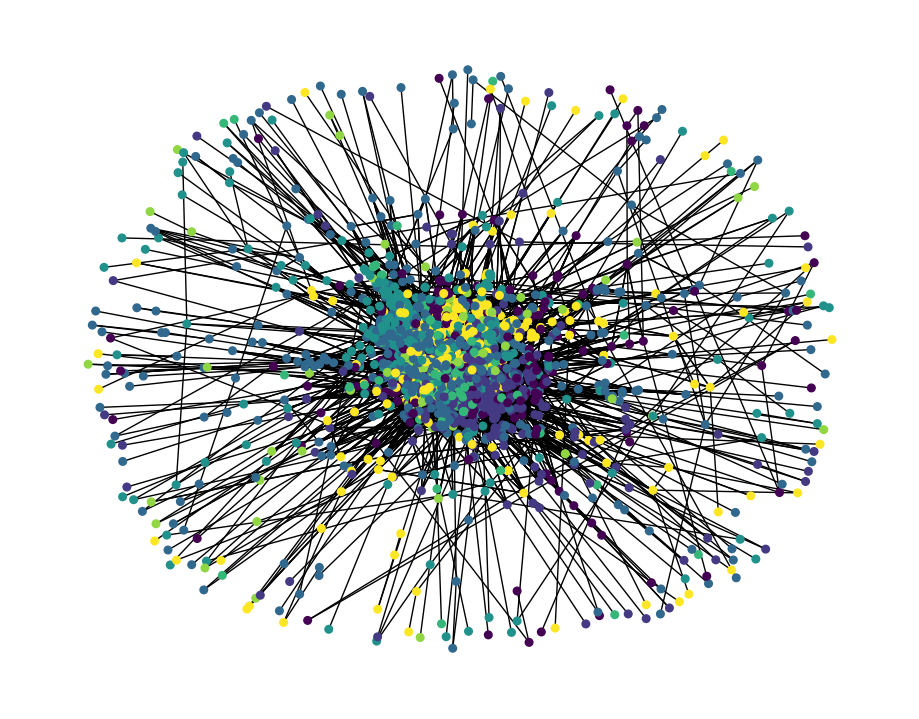

In [63]:
import random
from torch_geometric.utils import to_networkx
import networkx as nx

def convert_to_networkx(attacked_data, n_sample=None):

    G = to_networkx(attacked_data, node_attrs=["x"])
    y = attacked_data.y.numpy()

    if n_sample is not None:
        sampled_nodes = random.sample(g.nodes, n_sample)
        G = G.subgraph(sampled_nodes)
        y = y[sampled_nodes]

    return G, y


def plot_graph(G, y):

    plt.figure(figsize=(9, 7))
    nx.draw_spring(G, node_size=30, arrows=False, node_color=y)
    plt.show()


G, y = convert_to_networkx(attacked_data)
plot_graph(G, y)

In [64]:
attacked_data

Data(x=[2485, 1433], edge_index=[2, 10309], y=[2485], train_mask=[2485], val_mask=[2485], test_mask=[2485])

In [65]:
attacked_adj

NameError: ignored

In [66]:
attacked_adj = attacked_data.edge_index.t() ## Get the adjacency matrix,
attacked_adj

tensor([[   0, 1084],
        [   0, 1104],
        [   0, 1288],
        ...,
        [ 486, 1273],
        [ 980,  402],
        [ 698, 2409]])

In [67]:
attacked_adj.shape

torch.Size([10309, 2])

In [68]:
attacked_data

Data(x=[2485, 1433], edge_index=[2, 10309], y=[2485], train_mask=[2485], val_mask=[2485], test_mask=[2485])

In [77]:
attacked__features = attacked_data.x
print(attacked__features)
attacked__labels = attacked_data.y
print(attacked__labels)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([5, 2, 0,  ..., 2, 2, 2])


In [70]:
print(f"Number of nodes: {attacked_data.num_nodes}")
print(f"Number of edges: {attacked_adj.size(0)}")


Number of nodes: 2485
Number of edges: 10309


In [ ]:
#you should divide the total number of edges by 2 to get the actual number of unique edges in your undirected graph.

In [71]:
print(f'Number of edges: {attacked_data.num_edges}')
# Number of edges: 10556

Number of edges: 10309


In [76]:
10309/2

5154.5

In [74]:

print(f'Actual number of edges: {attacked_data.num_edges // 2}')


Actual number of edges: 5154


In [78]:
idx_train

NameError: ignored

In [79]:
# Get the train, validation, and test indices
idx_train = attacked_data.train_mask.nonzero().view(-1)
idx_val = attacked_data.val_mask.nonzero().view(-1)
idx_test = attacked_data.test_mask.nonzero().view(-1)


print(f"Number of features per node: {attacked__features.size(1)}")
print(f"Number of classes: {int(attacked__labels.max()) + 1}")
print(f"Number of training nodes: {len(idx_train)}")
print(f"Number of validation nodes: {len(idx_val)}")
print(f"Number of test nodes: {len(idx_test)}")

Number of features per node: 1433
Number of classes: 7
Number of training nodes: 247
Number of validation nodes: 249
Number of test nodes: 1988




```
in original planetoid dataset
Number of nodes: 10556
Number of edges: 13820218
Number of features per node: 1433
Number of classes: 7
Number of training nodes: 140
Number of validation nodes: 500
Number of test nodes: 1000
```



#GCN using modified graph

In [80]:
from torch_geometric.nn import GCNConv
from torch.nn import Linear, BatchNorm1d

class GCN(torch.nn.Module):
    def __init__(self, num_features, hidden_channels, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_channels)
        self.bn1 = BatchNorm1d(hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.bn2 = BatchNorm1d(hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels)
        self.bn3 = BatchNorm1d(hidden_channels)
        self.conv4 = GCNConv(hidden_channels, hidden_channels)
        self.bn4 = BatchNorm1d(hidden_channels)
        self.out = Linear(hidden_channels, num_classes)

    def forward(self, x, edge_index):
        # First Message Passing Layer (Transformation)
        x = self.conv1(x, edge_index)
        x = self.bn1(x)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)

        # Second Message Passing Layer
        x = self.conv2(x, edge_index)
        x = self.bn2(x)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)

        # Third Message Passing Layer
        x = self.conv3(x, edge_index)
        x = self.bn3(x)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)

        # Fourth Message Passing Layer
        x = self.conv4(x, edge_index)
        x = self.bn4(x)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)

        # Output layer
        x = self.out(x)
        x = F.softmax(x, dim=1)
        return x



Epoch 500/5000:
Train Loss: 1.1743, Train Accuracy: 0.9676, Train Precision: 0.9676, Train Recall: 0.9676
Validation Loss: 1.4348, Validation Accuracy: 0.7229, Validation Precision: 0.7229, Validation Recall: 0.7229
Test Loss: 1.4397, Test Accuracy: 0.6962, Test Precision: 0.6962, Test Recall: 0.6962

Epoch 1000/5000:
Train Loss: 1.1745, Train Accuracy: 0.9676, Train Precision: 0.9676, Train Recall: 0.9676
Validation Loss: 1.4520, Validation Accuracy: 0.7309, Validation Precision: 0.7309, Validation Recall: 0.7309
Test Loss: 1.4468, Test Accuracy: 0.6952, Test Precision: 0.6952, Test Recall: 0.6952

Epoch 1500/5000:
Train Loss: 1.1817, Train Accuracy: 0.9555, Train Precision: 0.9555, Train Recall: 0.9555
Validation Loss: 1.4456, Validation Accuracy: 0.7108, Validation Precision: 0.7108, Validation Recall: 0.7108
Test Loss: 1.4417, Test Accuracy: 0.6831, Test Precision: 0.6831, Test Recall: 0.6831

Epoch 2000/5000:
Train Loss: 1.1736, Train Accuracy: 0.9636, Train Precision: 0.9636, Tra

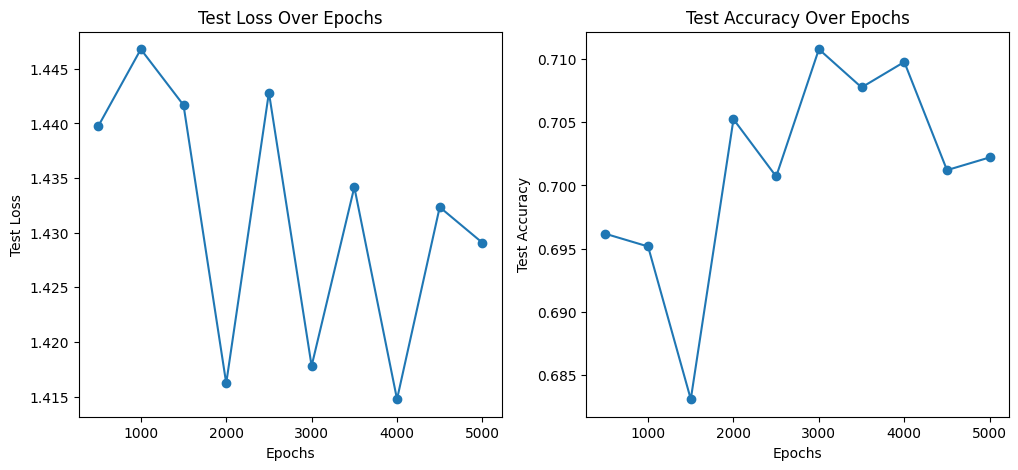

In [81]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Initialize the model and optimizer
num_features = attacked__features.size(1)
num_classes = int(attacked__labels.max()) + 1
hidden_channels = 64  # You can adjust this as needed
model = GCN(num_features, hidden_channels, num_classes)
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Define a function for evaluation
def evaluate(model, attacked_features,adj,attacked_labels, mask):
    model.eval()
    with torch.no_grad():
        logits = model(attacked_features, adj.t())
        logits = logits[mask]
        attacked_labels = attacked_labels[mask]
        pred = logits.max(1)[1]
        accuracy = accuracy_score(attacked_labels, pred)
        precision = precision_score(attacked_labels, pred, average='micro')
        recall = recall_score(attacked_labels, pred, average='micro')
        return accuracy, precision, recall

# Training loop
num_epochs = 5000
train_losses = []
val_losses = []
test_losses = []
train_accuracies = []
val_accuracies = []
test_accuracies = []

for epoch in range(1, num_epochs + 1):
    model.train()
    optimizer.zero_grad()
    logits = model(attacked__features, adj.t())
    loss = F.cross_entropy(logits[idx_train], attacked__labels[idx_train])
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
        train_loss = loss.item()
        val_loss = F.cross_entropy(logits[idx_val], attacked__labels[idx_val]).item()
        test_loss = F.cross_entropy(logits[idx_test], attacked__labels[idx_test]).item()

        train_accuracy, train_precision, train_recall = evaluate(model, attacked__features,attacked_adj,attacked__labels, idx_train)
        val_accuracy, val_precision, val_recall = evaluate(model, attacked__features,attacked_adj,attacked__labels, idx_val)
        test_accuracy, test_precision, test_recall = evaluate(model, attacked__features,attacked_adj,attacked__labels, idx_test)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        test_losses.append(test_loss)

        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        test_accuracies.append(test_accuracy)

        print(f"Epoch {epoch}/{num_epochs}:")
        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Train Precision: {train_precision:.4f}, Train Recall: {train_recall:.4f}")
        print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}, Validation Precision: {val_precision:.4f}, Validation Recall: {val_recall:.4f}")
        print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}, Test Precision: {test_precision:.4f}, Test Recall: {test_recall:.4f}")
        print("")


# Plot test loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(500, num_epochs + 1, 500), test_losses, marker='o')
plt.title('Test Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Test Loss')

plt.subplot(1, 2, 2)
plt.plot(range(500, num_epochs + 1, 500), test_accuracies, marker='o')
plt.title('Test Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.show()


#ufrue